In [302]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.model_selection import KFold

# Machine learning
import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('monokai')

In [303]:
df=pd.read_csv('D:\\Data Science\\Fish-Weight-Prediction\\Fish.csv')

# Descriptive and Univariate Analysis

In [304]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [305]:
df.shape

(159, 7)

In [306]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


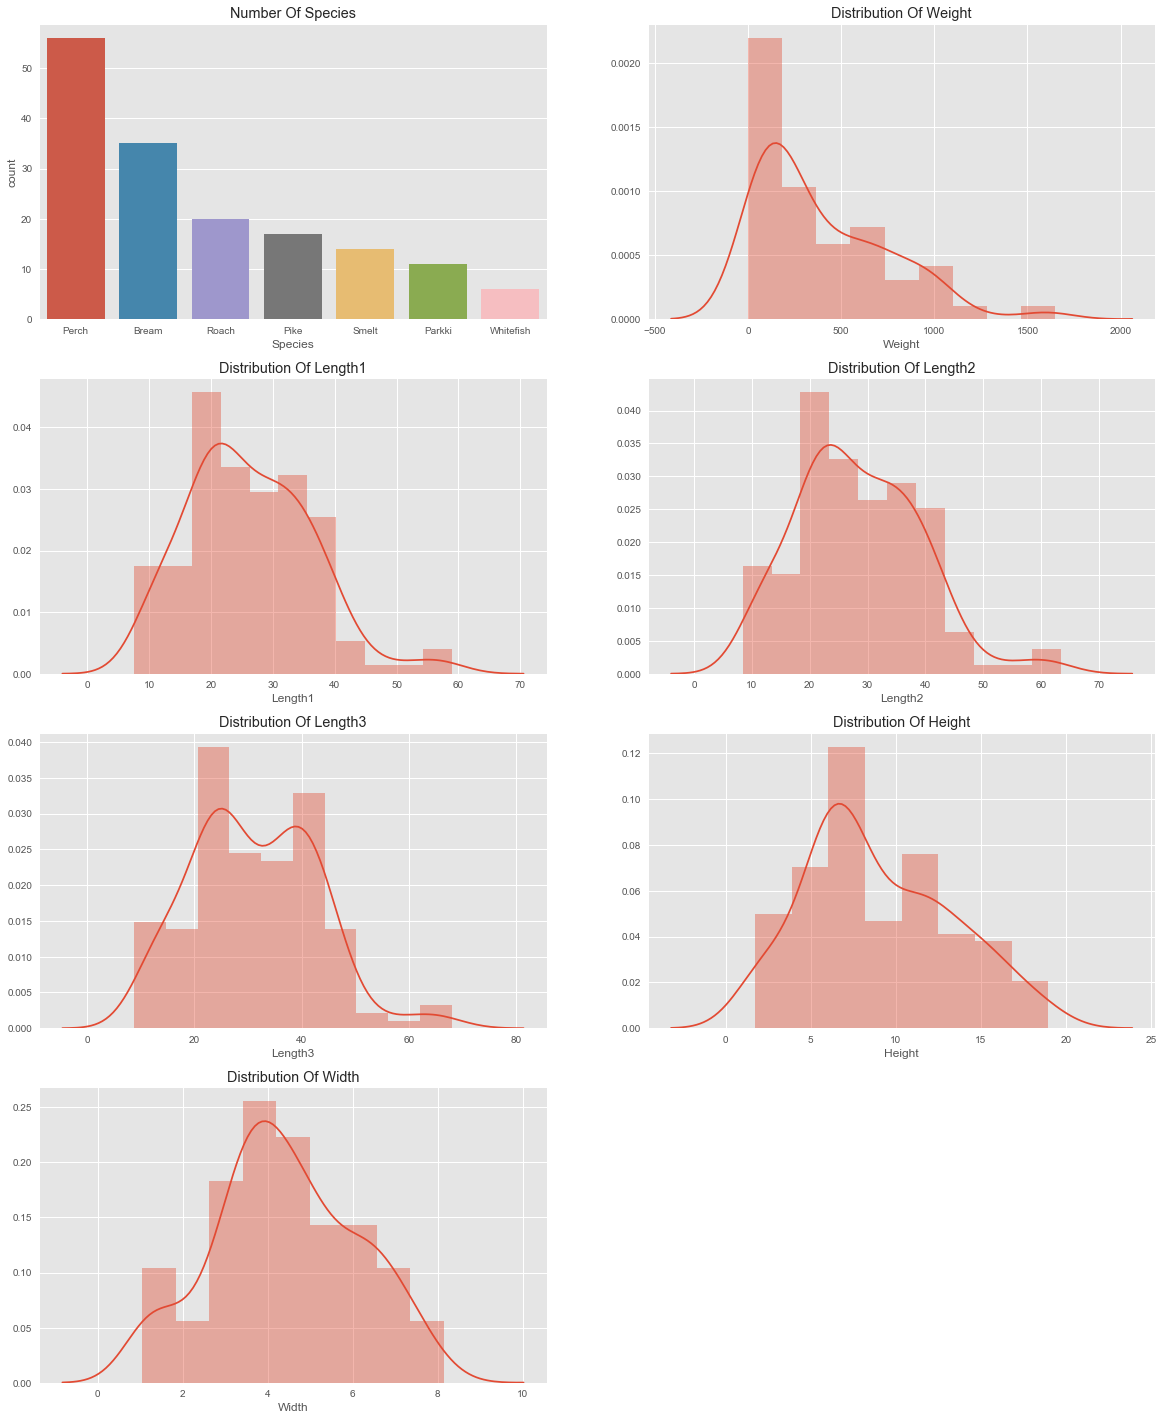

In [307]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))

plt.subplot(4,2,1)
sns.countplot(df.Species,order=df.Species.value_counts().index)
plt.title('Number Of Species')

plt.subplot(4,2,2)
sns.distplot(df.Weight)
plt.title('Distribution Of Weight')

plt.subplot(4,2,3)
sns.distplot(df.Length1)
plt.title('Distribution Of Length1')

plt.subplot(4,2,4)
sns.distplot(df.Length2)
plt.title('Distribution Of Length2')

plt.subplot(4,2,5)
sns.distplot(df.Length3)
plt.title('Distribution Of Length3')

plt.subplot(4,2,6)
sns.distplot(df.Height)
plt.title('Distribution Of Height')

plt.subplot(4,2,7)
sns.distplot(df.Width)
plt.title('Distribution Of Width')
plt.show()

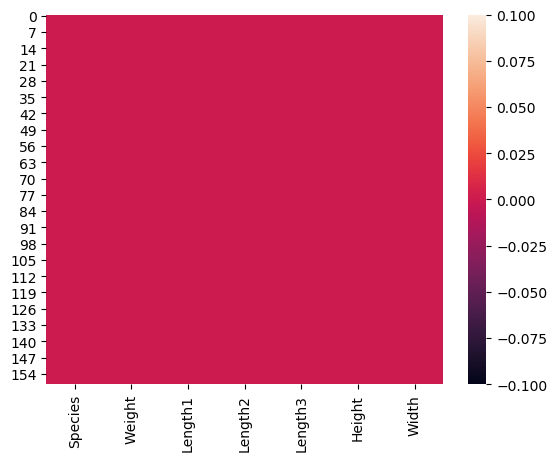

In [308]:
plt.style.use('default')
sns.heatmap(df.isna())
plt.show()

## Observations

### There are no NULL Values.
### All are numerical variables are normally Distributed.
### There are 159 rows and 7 columns
### Weight is our TARGET Variable

# Bi-variate Analysis

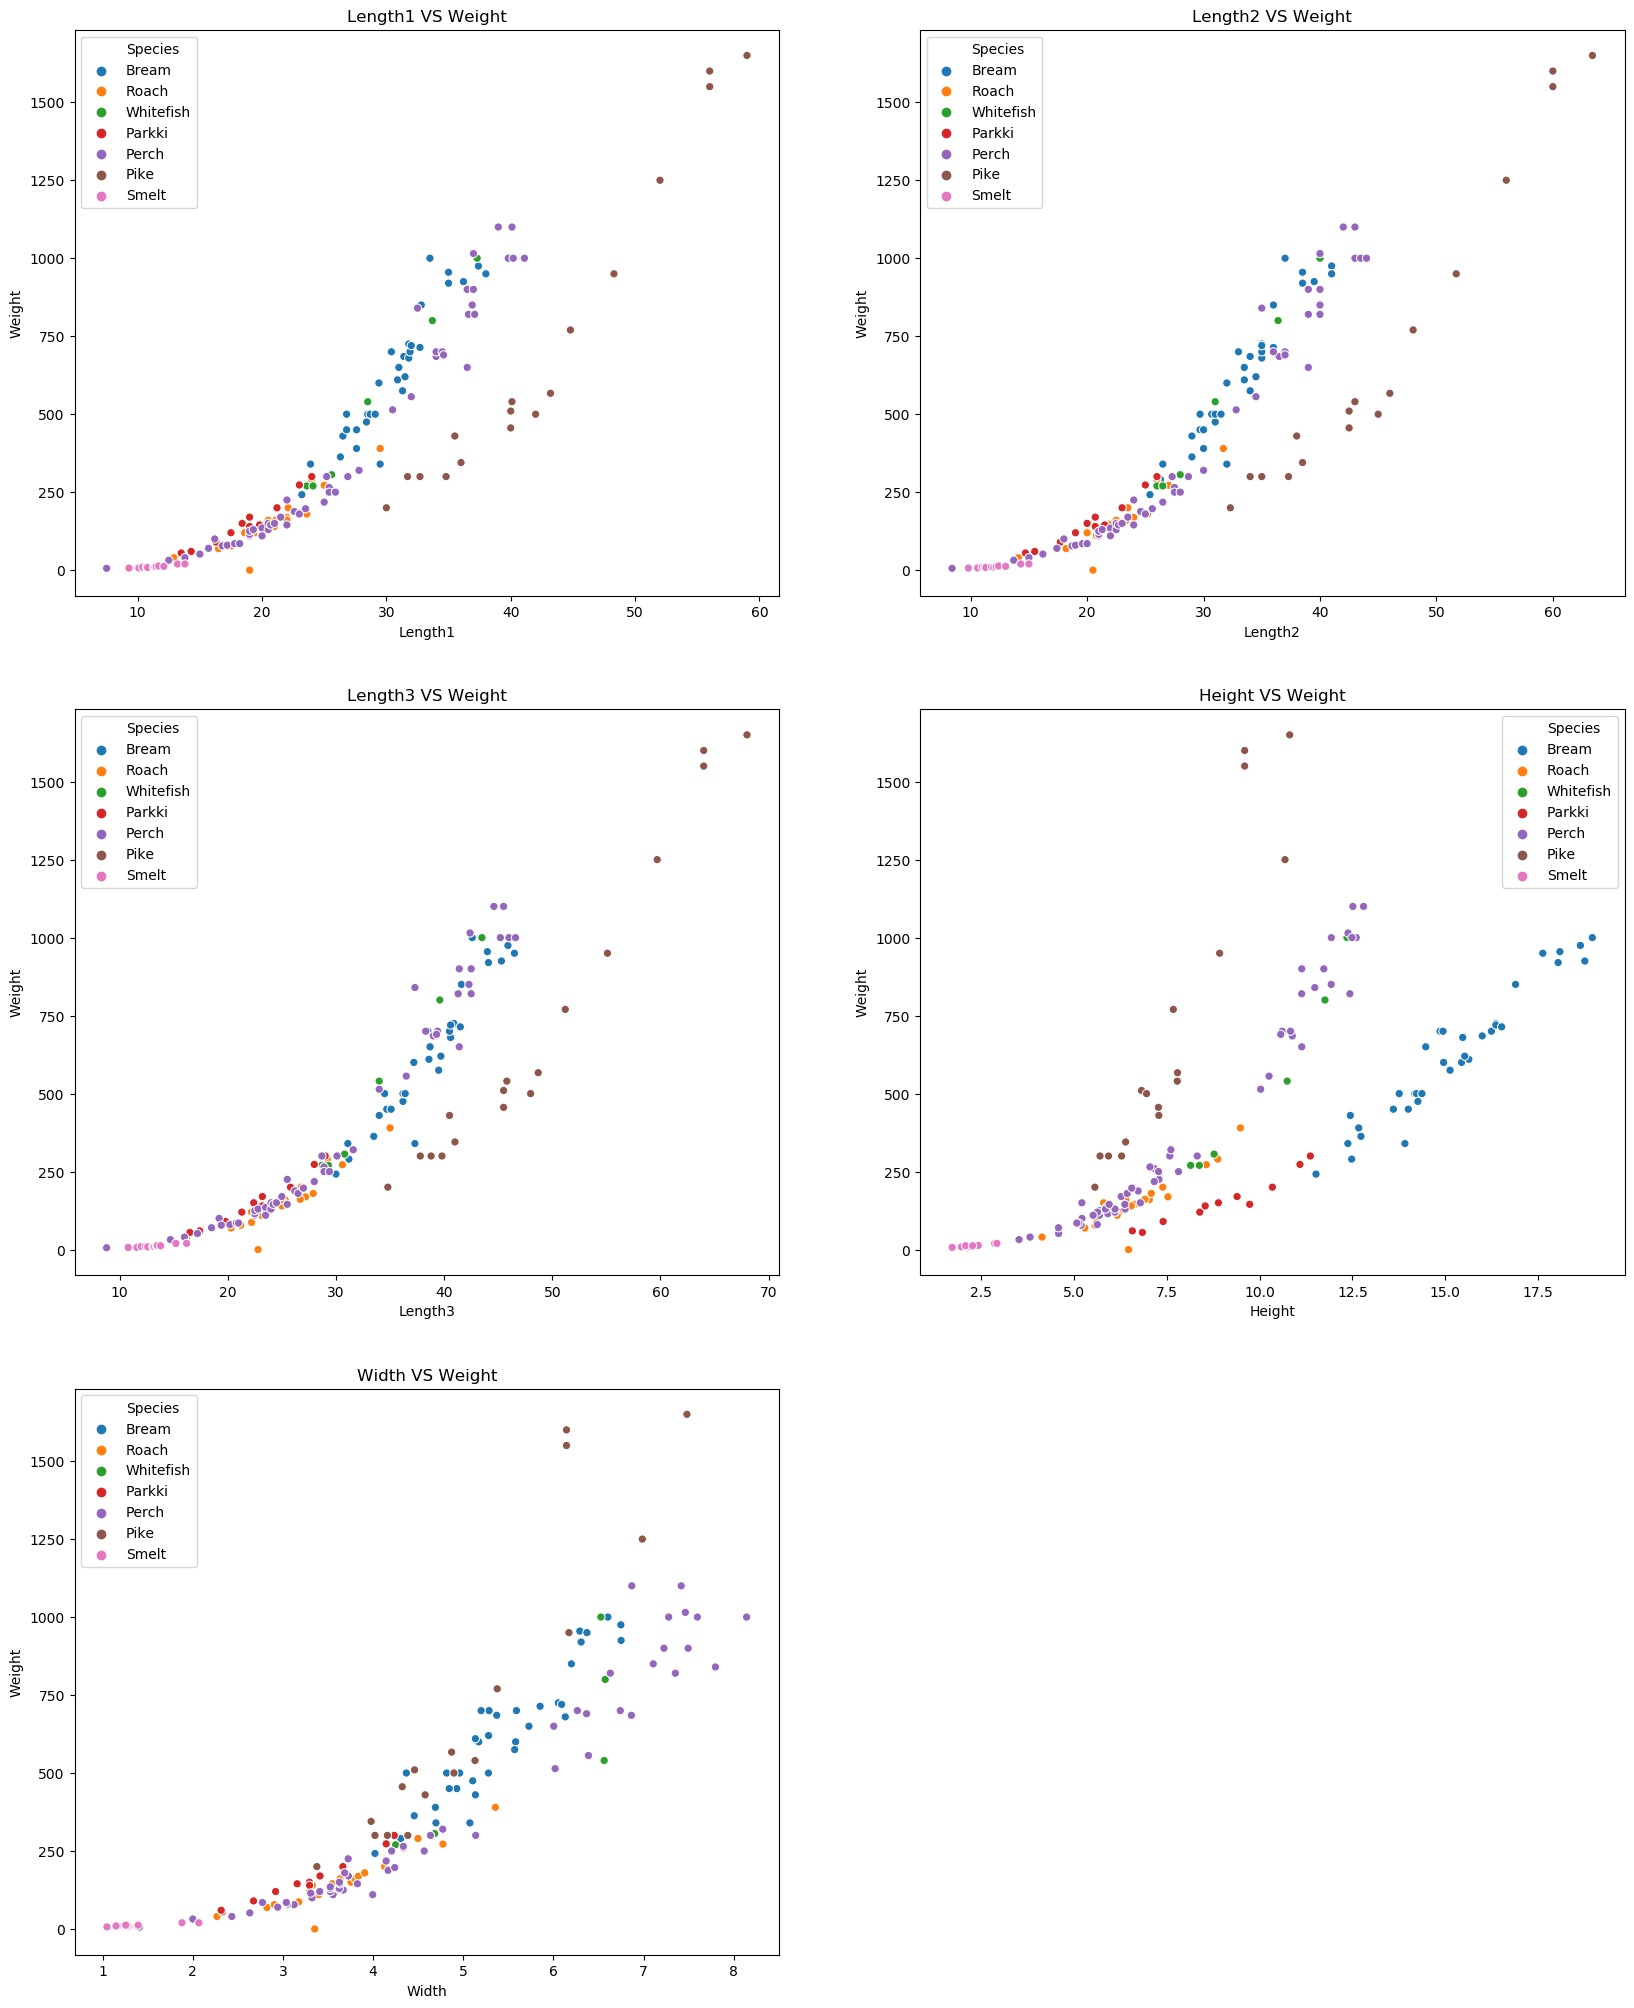

In [309]:
plt.style.use('default')
plt.figure(figsize=(20,25))

plt.subplot(3,2,1)
sns.scatterplot(x=(df.Length1),y=df.Weight,hue=df.Species)
plt.title('Length1 VS Weight')

plt.subplot(3,2,2)
sns.scatterplot(x=(df.Length2),y=df.Weight,hue=df.Species)
plt.title('Length2 VS Weight')

plt.subplot(3,2,3)
sns.scatterplot(x=(df.Length3),y=df.Weight,hue=df.Species)
plt.title('Length3 VS Weight')

plt.subplot(3,2,4)
sns.scatterplot(x=(df.Height),y=df.Weight,hue=df.Species)
plt.title('Height VS Weight')

plt.subplot(3,2,5)
sns.scatterplot(x=(df.Width),y=df.Weight,hue=df.Species)
plt.title('Width VS Weight')

plt.show()

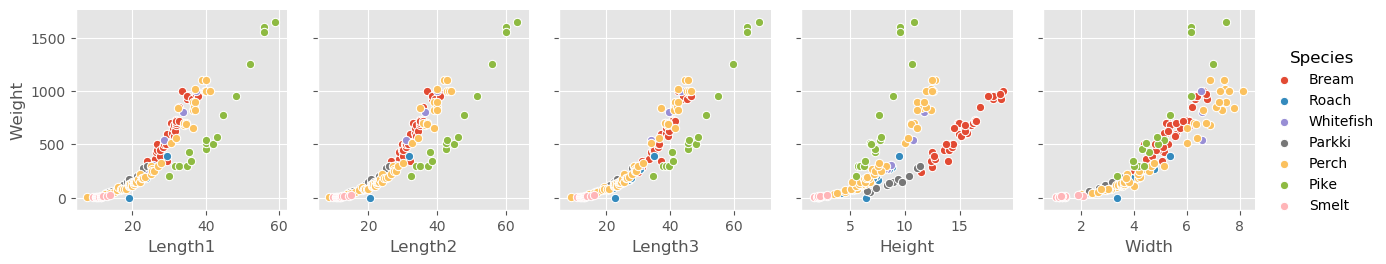

In [310]:
plt.style.use('ggplot')
sns.pairplot(x_vars=['Length1','Length2','Length3','Height','Width'],y_vars='Weight',hue='Species',data=df)
plt.show()

## Dependent Variable - Weight shows Linear Relationship with all the other variables

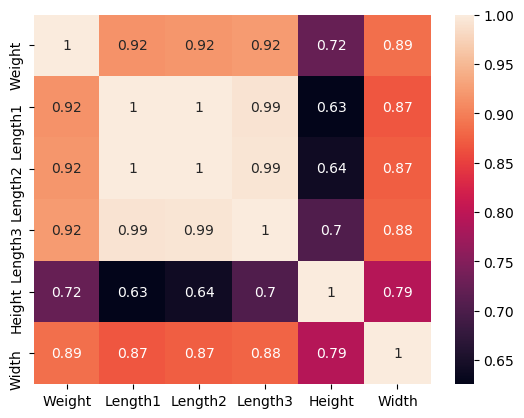

In [311]:
plt.style.use('default')
sns.heatmap(df.corr() ,annot=True)
plt.show()

## All the variables are strongly Co-related with Weight

# Outliers

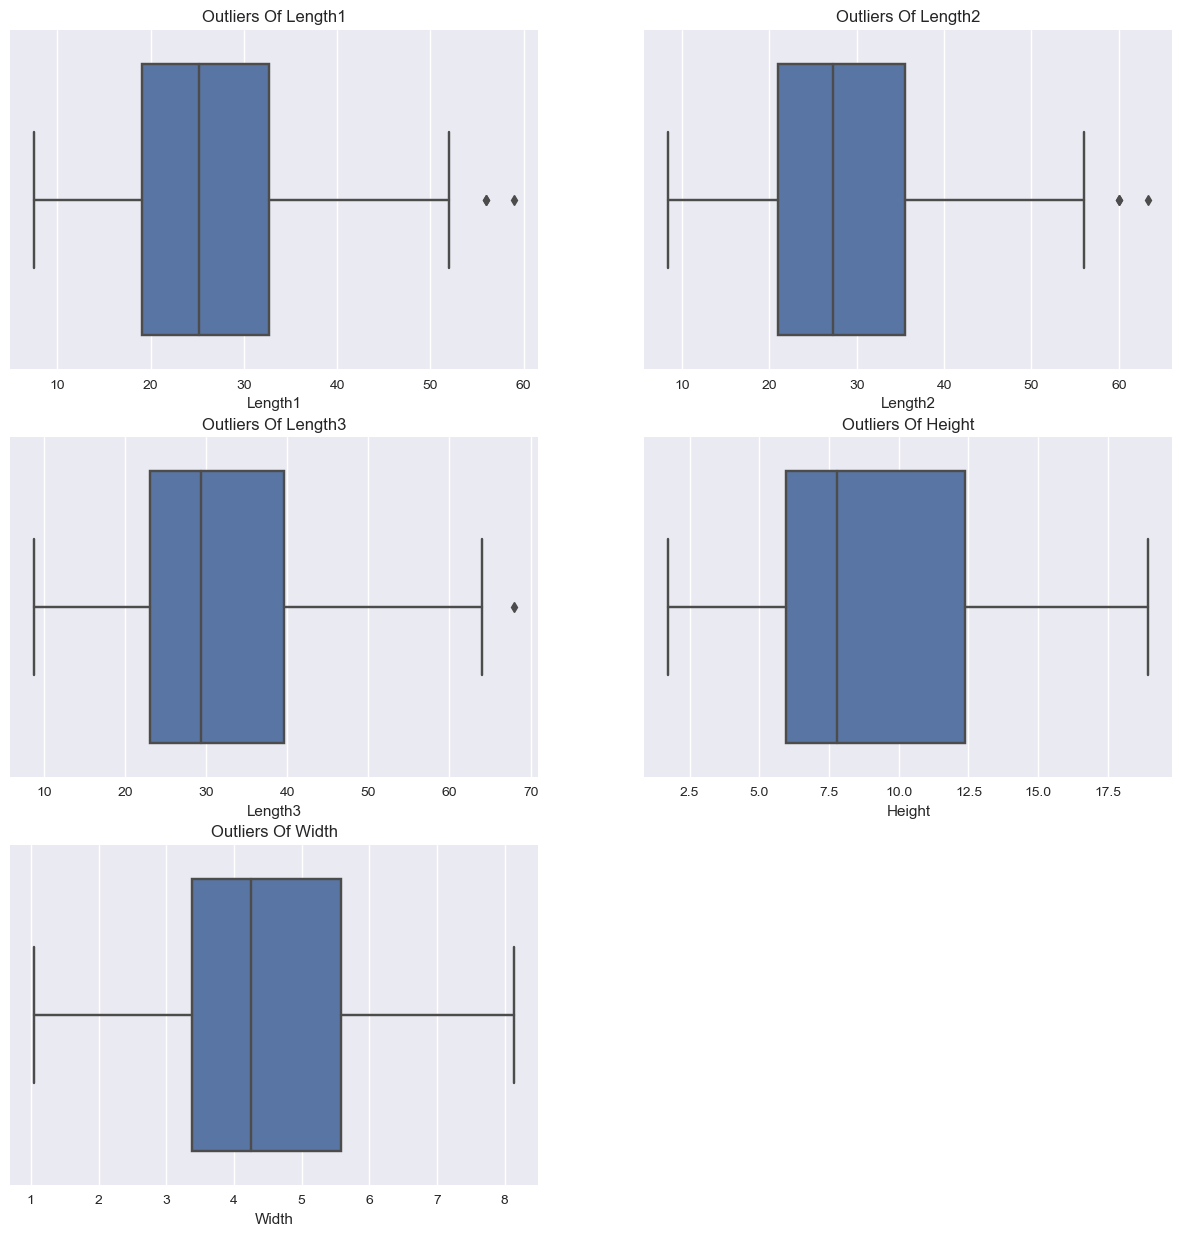

In [312]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
j=0
for i in ['Length1','Length2','Length3','Height','Width']:
    j+=1
    plt.subplot(3,2,j)
    sns.boxplot(df[i])
    plt.title('Outliers Of '+i)
plt.show()

In [313]:
out = df.Length1
Q3 = out.quantile(0.75)
Q1 = out.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length3_outliers = out[(out <lower_limit) | (out >upper_limit)]
length3_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [314]:
out = df.Length2
Q3 = out.quantile(0.75)
Q1 = out.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length3_outliers = out[(out <lower_limit) | (out >upper_limit)]
length3_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [315]:
out = df.Length3
Q3 = out.quantile(0.75)
Q1 = out.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length3_outliers = out[(out <lower_limit) | (out >upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

## 142,143,144 consist of Outliers So we can Delete those rows.

In [316]:
df.drop(index=[142,143,144],axis=0,inplace=True)

In [317]:
df.shape

(156, 7)

In [318]:
y_train=df.Weight

In [319]:
df.drop('Weight',axis=1,inplace=True)

In [320]:
x_train=df.copy()

In [321]:
x_train.head()

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [322]:
encoder=LabelEncoder()
x_train.Species=encoder.fit_transform(x_train.Species)

In [323]:
x_train.head()

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340


In [324]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
#X_test = sc_X.transform(X_test)

In [325]:
from sklearn.feature_selection import VarianceThreshold
varModel=VarianceThreshold(threshold=0)
varModel.fit(x_train)
constArr=varModel.get_support()
constArr
import collections
collections.Counter(constArr)

Counter({True: 6})

In [326]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)

In [327]:
x_train.shape

(124, 6)

In [328]:
x_test.shape

(32, 6)

In [329]:
y_train.shape

(124,)

In [330]:
y_test.shape

(32,)

# Machine Learning Algorithms

# Linear Regression

In [331]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
Y_pred_lin_reg = lin_reg.predict(x_test)

print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(y_test, Y_pred_lin_reg)*100)

Linear Regression: 
RMSE: 91.30275409045473
R2 score: 92.02567948572947


# KNN

In [332]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
Y_pred_knn = knn.predict(x_test)

print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_knn)))
print("R2 score:", r2_score(y_test, Y_pred_knn)*100)

KNN regression: 
RMSE: 53.61852699860377
R2 score: 97.24985438597469


# Decision Tree Regressor

In [333]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
Y_pred_dec = dec_tree.predict(x_test)

print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_dec)))
print("R2 score:", r2_score(y_test, Y_pred_dec)*100)

Decision tree regression: 
RMSE: 71.86851057660789
R2 score: 95.05913235196599


# Random Forest Regressor

In [334]:
ran_for = RandomForestRegressor()
ran_for.fit(x_train, y_train)
Y_pred_ran_for = ran_for.predict(x_test)

print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(y_test, Y_pred_ran_for)*100)

Random forest regression: 
RMSE: 52.295130098616724
R2 score: 97.38393562314772


# XGB Regressor

In [335]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train, y_train)
Y_pred_xgb = xgb.predict(x_test)

print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(y_test, Y_pred_xgb)))
print("R2 score:", r2_score(y_test, Y_pred_xgb)*100)

XGB regression: 
RMSE: 51.3097583403344
R2 score: 97.48159327772784
